In [1]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

2023-05-01 19:29:45.801644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 19:29:45.920003: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-01 19:29:45.924777: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/wissem/.local/lib/python3.10/site-packages/cv2/../../lib64:/u01/app/oracle/pr

# Checking for corrupted images

In [2]:
def verify_corrupted_image(img_path):
    try:
        io.imread(img_path)
    except:
        print('bad file', img_path)
        os.remove(img_path)

In [3]:
dataset_directory = 'dataset'
for img in os.listdir(dataset_directory):
    img_path = os.path.join(dataset_directory, img)
    verify_corrupted_image(img_path)

# Image resizing

In [16]:
def resize_image(img_path, img_size):
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (img_size, img_size))
    return resized_img

In [17]:
dataset_directory = 'dataset'
for img in os.listdir(dataset_directory):
    img_path = os.path.join(dataset_directory, img)
    resized_img = resize_image(img_path, 512)
    cv2.imwrite(img_path, resized_img)

# Data Augmentation

In [ ]:
dataset_directory = 'dataset_for_volume&brand_classification'
IMG_SIZE = 512

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    )

for directory in os.listdir(dataset_directory):
    dataset = []
    for i, img in enumerate(os.listdir(os.path.join(dataset_directory, directory))):
        img_path = os.path.join(dataset_directory, directory, img)
        image = io.imread(img_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((IMG_SIZE, IMG_SIZE))
        image = np.array(image)
        dataset.append(image)

        x = np.array(dataset)
        i = 0
        for batch in datagen.flow(x, batch_size=16,
                                  save_to_dir=os.path.join(dataset_directory, directory),
                                  save_format='jpg'):
            i += 1
            if i > 32:
                break

# image editing

## Adjusting image Brightness

In [7]:
def adjust_image_brightness(img_path, factor):
    img = Image.open(img_path)
    enhancer = ImageEnhance.Brightness(img)
    enhanced_img = enhancer.enhance(factor)
    return enhanced_img

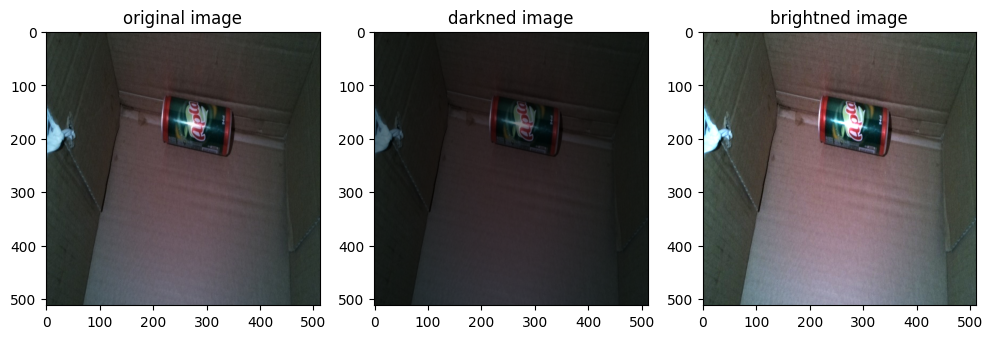

In [10]:
dataset_directory = "dataset"

img_path = os.path.join(dataset_directory, "APLA0.jpg")

#darkens the image
darkned_img = adjust_image_brightness(img_path, 0.5)

#brightens the image
brightned_img = adjust_image_brightness(img_path, 1.5)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(Image.open(img_path))
axs[0].set_title('original image')

axs[1].imshow(darkned_img)
axs[1].set_title('darkned image')

axs[2].imshow(brightned_img)
axs[2].set_title('brightned image')

plt.show()

## Adjusting image sharpness

In [8]:
def adjust_image_sharpness(img_path, factor):
    img = Image.open(img_path)
    enhancer = ImageEnhance.Sharpness(img)
    enhanced_img = enhancer.enhance(factor)
    return enhanced_img

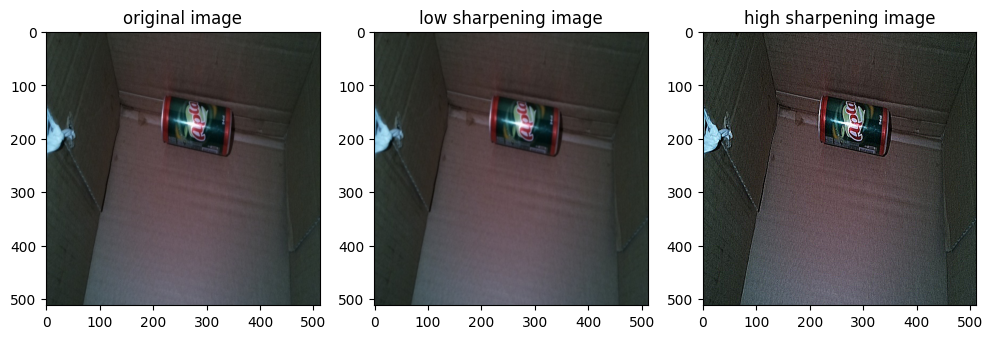

In [12]:
dataset_directory = "dataset"

img_path = os.path.join(dataset_directory, "APLA0.jpg")

#Low sharpening
low_sharpening_img = adjust_image_sharpness(img_path, 0.05)

#High sharpening
high_sharpening_img = adjust_image_sharpness(img_path, 10)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(Image.open(img_path))
axs[0].set_title('original image')

axs[1].imshow(low_sharpening_img)
axs[1].set_title('low sharpening image')

axs[2].imshow(high_sharpening_img)
axs[2].set_title('high sharpening image')

plt.show()

## Adjusting image Contrast

In [9]:
def adjust_image_contrast(img_path, factor):
    img = Image.open(img_path)
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(factor)
    return enhanced_img

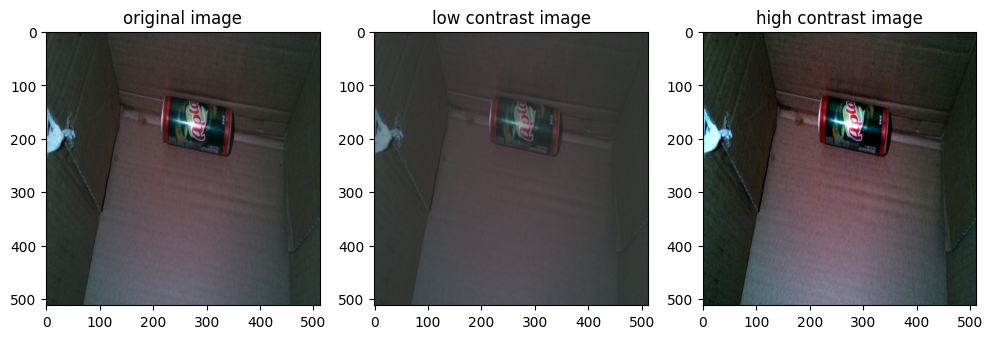

In [19]:
dataset_directory = "dataset"

img_path = os.path.join(dataset_directory, "APLA0.jpg")

#Low contrast
low_contrast_img = adjust_image_contrast(img_path, 0.5)

#High contrast
high_contrast_img = adjust_image_contrast(img_path, 1.5)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(Image.open(img_path))
axs[0].set_title('original image')

axs[1].imshow(low_contrast_img)
axs[1].set_title('low contrast image')

axs[2].imshow(high_contrast_img)
axs[2].set_title('high contrast image')

plt.show()

## Removing image Background

In [4]:
from rembg import remove
from PIL import ImageEnhance

In [5]:
def remove_image_background(img_path):
    img = Image.open(img_path)
    no_bg_img = remove(img)
    return no_bg_img

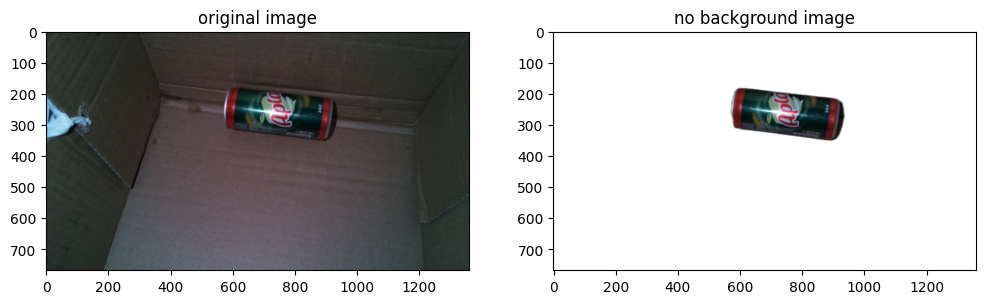

In [7]:
dataset_directory = 'dataset'
img_path = os.path.join(dataset_directory, 'APLA0.jpg')
no_bg_img = remove_image_background(img_path)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(Image.open(img_path))
axs[0].set_title('original image')

axs[1].imshow(no_bg_img)
axs[1].set_title('no background image')

plt.show()

In [8]:
dataset_directory = 'dataset'
dataset_no_bg_directory = 'dataset_no_bg'
for img in os.listdir(dataset_directory):
    img_path = os.path.join(dataset_directory, img)
    no_bg_img = remove_image_background(img_path)
    no_bg_img.save(os.path.join(dataset_no_bg_directory, img), 'png')

## drawing contour around object using image segmentation

The object occupies 2.0 pixels.


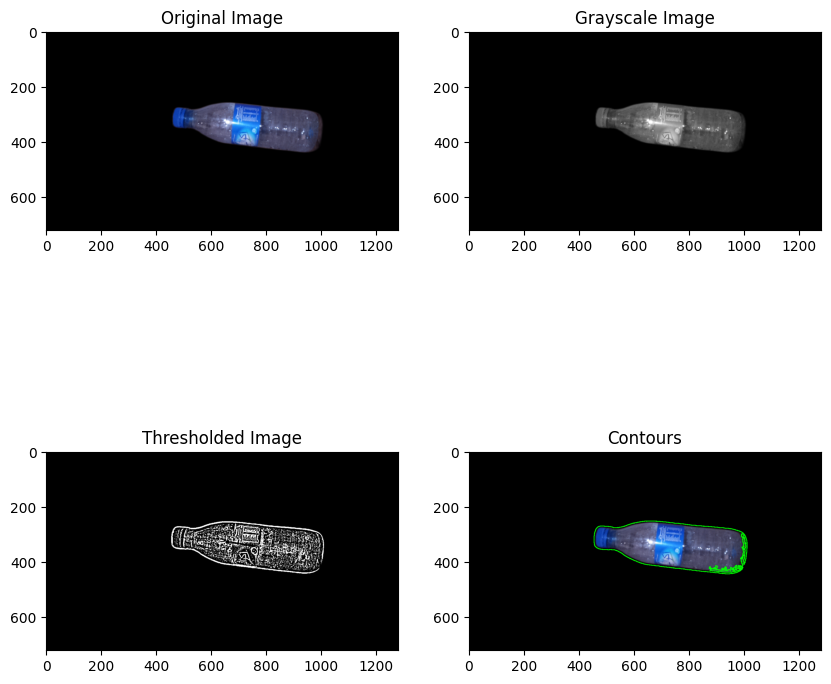

In [3]:
dataset_no_bg_directory = 'dataset_no_bg'
img = cv2.imread(os.path.join(dataset_no_bg_directory, "aqualine11.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilated = cv2.dilate(thresh, kernel, iterations=1)

contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Calculate the total bottle area
area = cv2.contourArea(contours[0])
print(f"The object occupies {area} pixels.")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(gray, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[1, 0].imshow(thresh, cmap='gray')
axs[1, 0].set_title("Thresholded Image")
axs[1, 1].imshow(contour_img, cmap='gray')
axs[1, 1].set_title("Contours")
plt.show()